## https://www.kaggle.com/c/instacart-market-basket-analysis

Цель соревнования - предсказать, что пользователь закажет в следующий раз

In [1]:
path = '/home/stroykova/data/instacart_2017_05_01'

In [2]:
ls $path

aisles.csv       order_products__prior.csv  orders.csv
departments.csv  order_products__train.csv  products.csv


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [4]:
orders = pd.read_csv(os.path.join(path, 'orders.csv'))
# order_id: order identifier
# user_id: customer identifier
# eval_set: which evaluation set this order belongs in (see SET described below)
# order_number: the order sequence number for this user (1 = first, n = nth)
# order_dow: the day of the week the order was placed on
# order_hour_of_day: the hour of the day the order was placed on
# days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)

In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


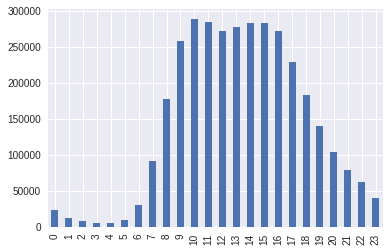

In [6]:
orders['order_hour_of_day'].value_counts(sort=False).plot.bar()

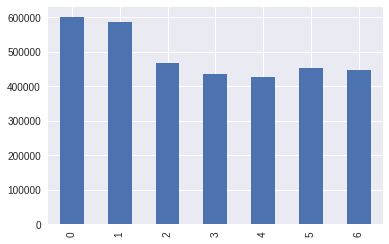

In [7]:
orders['order_dow'].value_counts(sort=False).plot.bar()

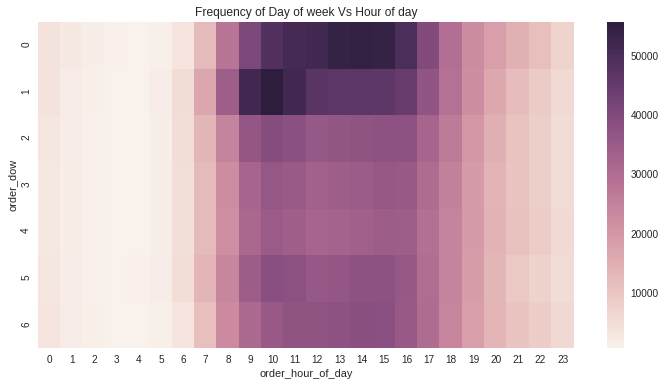

In [45]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [9]:
orders.order_id.unique().shape

(3421083,)

In [10]:
orders.user_id.unique().shape

(206209,)

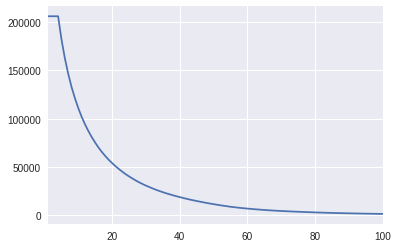

In [11]:
orders.order_number.value_counts().plot()

In [12]:
orders.order_number.value_counts().head()

1    206209
2    206209
3    206209
4    206209
5    182223
Name: order_number, dtype: int64

In [13]:
orders.order_number.value_counts().tail()

96     1592
97     1525
98     1471
99     1421
100    1374
Name: order_number, dtype: int64

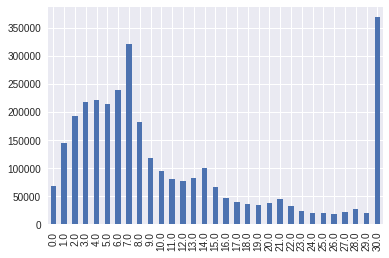

In [14]:
orders['days_since_prior_order'].value_counts(sort=False).sort_index().plot.bar()

In [15]:
order_products__prior = pd.read_csv(os.path.join(path, 'order_products__prior.csv'))
# order_id: foreign key
# product_id: foreign key
# add_to_cart_order: order in which each product was added to cart
# reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

In [16]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [17]:
order_products__prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtypes: int64(4)
memory usage: 989.8 MB


## Размер заказа

In [20]:
top_counts = order_products__prior[["order_id"]].groupby(['order_id']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

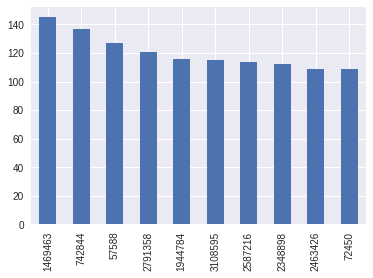

In [24]:
top_counts.head(10)['counts'].plot.bar()

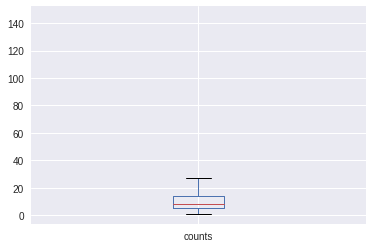

In [27]:
top_counts['counts'].plot.box()

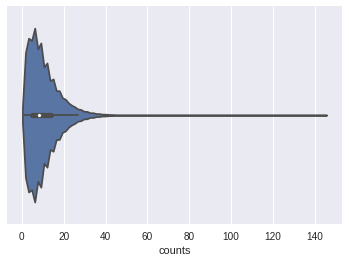

In [42]:
sns.violinplot(data=top_counts, x='counts')

In [30]:
pd.options.display.float_format = '{:,.1f}'.format
top_counts['counts'].describe()

count   3,214,874.0
mean           10.1
std             7.5
min             1.0
25%             5.0
50%             8.0
75%            14.0
max           145.0
Name: counts, dtype: float64

In [41]:
top_counts.head()

,order_id,counts
1469463,1564244,145
742844,790903,137
57588,61355,127
2791358,2970392,121
1944784,2069920,116


## Самые популярные продукты

In [31]:
products = pd.read_csv(os.path.join(path, 'products.csv'))
# product_id: product identifier
# product_name: name of the product
# aisle_id: foreign key
# department_id: foreign key

In [33]:
top_product_count = order_products__prior[["product_id"]].groupby(['product_id']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

In [34]:
top_product_count.head()

,product_id,counts
24848,24852,472565
13172,13176,379450
21133,21137,264683
21899,21903,241921
47198,47209,213584


In [36]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


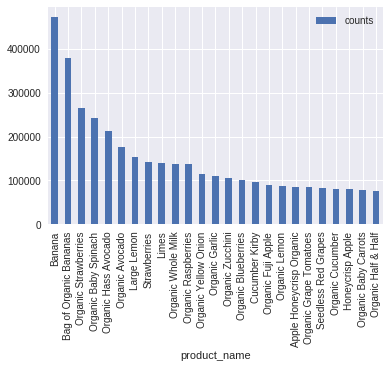

In [40]:
top_product_count.head(25).merge(products, on='product_id')[['product_name', 'counts']].plot.bar(x='product_name')

# Что еще можно визуализировать?
* какие продукты были заказаны снова
* какие продукты заказываются в первый раз
* какая доля продуктов заказывается впервые\вновь
* какие продукты кладут в корзину первыми? вторыми? ...
* посмотреть на распределения заказов внутри aisle\department. Найти, выделяется ли какой-то из aisle\department
* посмотреть на повторные заказы внутри aisle\department
* можно ли выделить пользователей, которые заказывают только organic?
* есть ли пользователи, которые заказывают только продукты питания? или только непродовольственные товары?